## TALLER 3 - factorización de matrices

María Alejandra Reyes Afanador - mareyesa@eafit.edu.co , Jhon Jairo Hernandez Slait - jjhernans1@eafit.edu.co y Cristian Alberto López Chaverra - calopezc@eafit.edu.co

Algebra en Ciencia de los Datos

2023 - 2

### Problema 1

Lea sobre el método de potencias para aproximar el valor propio mayor de una matríz. Realice los dos ejercicios que se encuentran al final de esta guía: Approximating Eigenvalues - Jupyter Guide to Linear Algebra


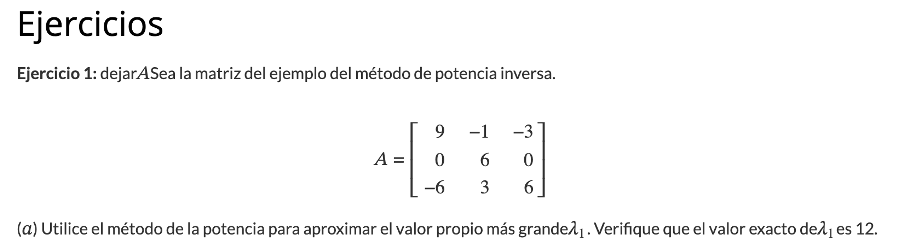

In [118]:
import numpy as np

A = np.array([[9, -1, -3], [0, 6, 0], [-6, 3, 6]])

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A @ X
difference = Y - np.linalg.norm(Y) * X

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X = Y
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    Y = A @ X
    difference = Y - np.linalg.norm(Y) * X

    m = m + 1

print("El vector propio es aproximadamente:")
print(X, '\n')
print("La magnitud del valor propio es aproximadamente:")
print(np.linalg.norm(Y), '\n')
print("La magnitud de la diferencia es:")
print(np.linalg.norm(difference))


El vector propio es aproximadamente:
[[ 0.7071088 ]
 [ 0.        ]
 [-0.70710476]] 

La magnitud del valor propio es aproximadamente:
12.000008583030988 

La magnitud de la diferencia es:
2.5749255655705085e-05


Se encontró un "vector especial" [0.7071088,0,-0.70710476] que representa una dirección particular en un conjunto de datos tridimensionales. En esta dirección, los datos están estirados aproximadamente por un factor de 12.
La aproximación del valor propio más grande es 12.000008583030988, que es muy cercano al valor exacto de 12 como lo indica el enunciado.

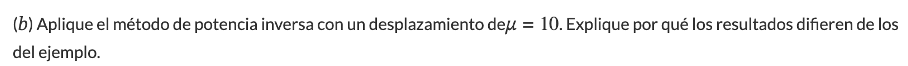

In [120]:
import numpy as np
import scipy.linalg as sla

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9, -1, -3], [0, 6, 0], [-6, 3, 6]])
I = np.eye(3)
mu = 10
Shifted_A = A - mu * I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization, X)
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    difference = X - X_previous

    m = m + 1

print("El vector propio es aproximadamente:")
print(X, '\n')
print("El valor propio de A es aproximadamente:")
print(np.linalg.norm(A @ X))


El vector propio es aproximadamente:
[[ 0.70710005]
 [-0.        ]
 [-0.70711351]] 

El valor propio de A es aproximadamente:
11.999971451947284


Los resultados difieren con los del ejemplo porque el desplazamiento (μ) altera qué valor propio estamos aproximando, lo que lleva a resultados diferentes en términos de los vectores y valores propios aproximados. En el ejemplo μ es de 7.5 y en este ejercicio es de 10.

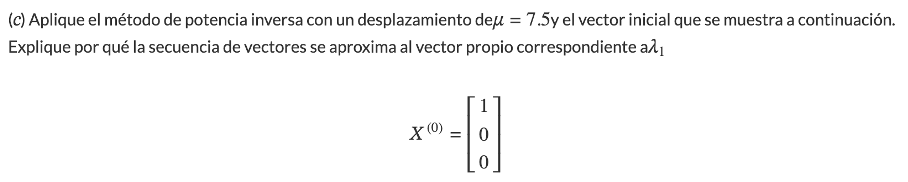

In [218]:
import numpy as np
import scipy.linalg as sla

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9, -1, -3], [0, 6, 0], [-6, 3, 6]])
I = np.eye(3)
mu = 7.5
Shifted_A = A - mu * I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization, X)
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    difference = X - X_previous

    m = m + 1

print("El vector propio es aproximadamente:")
print(X, '\n')
print("El valor propio de A es aproximadamente:")
print(np.linalg.norm(A @ X))

El vector propio es aproximadamente:
[[ 1.]
 [ 0.]
 [-0.]] 

El valor propio de A es aproximadamente:
10.816653826391969


Este es el resultado que menos converge, ya que es el menos cercado a 12.

La secuencia de vectores se aproxima al vector propio correspondiente a λ1 porque el método de potencia inversa con desplazamiento ajusta la matriz original A de manera que el valor propio de interés se desplace hacia μ. Al utilizar un desplazamiento μ cercano a λ1, el método se enfoca en encontrar el vector propio asociado al valor propio más grande. Esto significa que a medida que iteramos, los vectores resultantes se ajustan cada vez más al vector propio dominante de la matriz desplazada, que coincide con el vector propio correspondiente a λ1 en la matriz original A.

#### Comparación de resultados

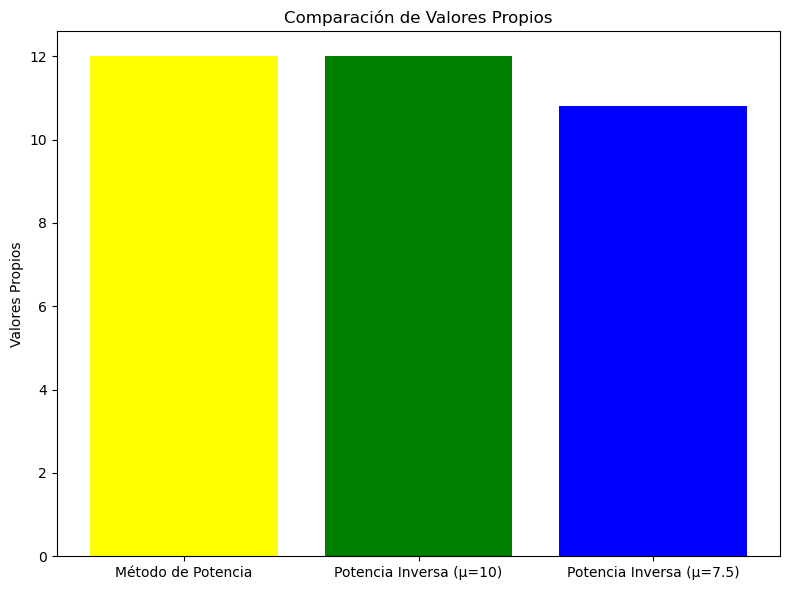

In [123]:
import matplotlib.pyplot as plt

# Definir los valores propios obtenidos por cada método
valores_propios = [12.000008583030988 , 11.999971451947284, 10.816653826391969]

metodos = ['Método de Potencia', 'Potencia Inversa (μ=10)', 'Potencia Inversa (μ=7.5)']

# Crear la figura para el gráfico de valores propios
plt.figure(figsize=(8, 6))

# Graficar los valores propios
plt.bar(metodos, valores_propios, color=['yellow', 'green', 'blue'])
plt.ylabel('Valores Propios')
plt.title('Comparación de Valores Propios')

plt.tight_layout()
plt.show()

Método de Potencia y Potencia Inversa (μ=10) son los que más se aproximan al valor exacto que es 12.

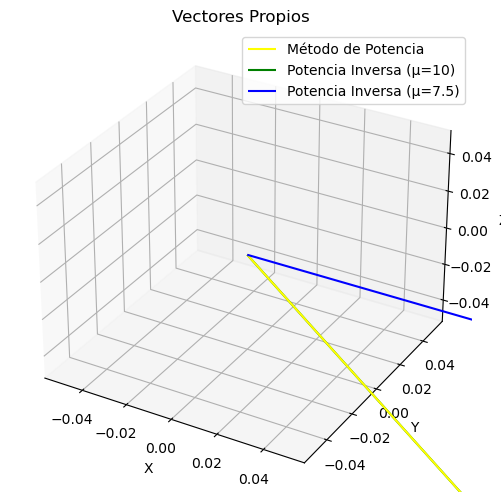

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los vectores propios obtenidos por cada método
vectores_propios = [np.array([[0.7071088], [0], [-0.70710476]]), 
                    np.array([[0.70710005], [0], [-0.70711351]]), 
                    np.array([[1], [0], [-0]])]

metodos = ['Método de Potencia', 'Potencia Inversa (μ=10)', 'Potencia Inversa (μ=7.5)']

# Colores para los vectores propios
colores = ['yellow', 'green', 'blue']

# Crear la figura para el gráfico de vectores propios
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los vectores propios con colores diferentes
for i, vec_propio in enumerate(vectores_propios):
    ax.quiver(0, 0, 0, vec_propio[0], vec_propio[1], vec_propio[2], color=colores[i], label=metodos[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Vectores Propios')

plt.show()


Potencia Inversa con μ=10 se destaca como el mejor en comparación con Método de Potencia y  Potencia Inversa con μ=7.5, debido a su rápida convergencia y alta precisión. Al emplear un valor de desplazamiento (μ=10) cercano al valor propio dominante, converge rápidamente hacia una solución precisa sin necesitar ajustes adicionales. Esto significa que proporciona resultados muy cercanos al valor propio real con menos iteraciones

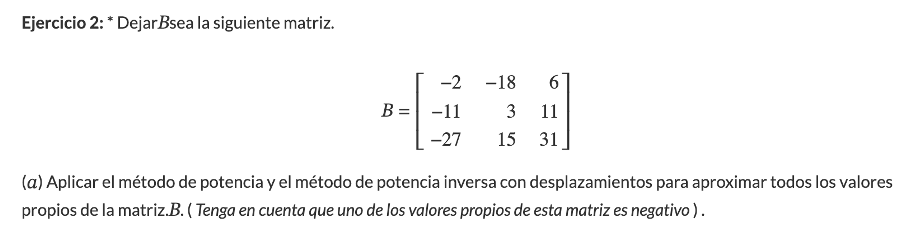

In [125]:
# Método de Potencia Tradicional
import numpy as np

B = np.array([[-2, -18, 6], [-11, 3, 11], [-27, 15, 31]])

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = B @ X
difference = Y - np.linalg.norm(Y) * X

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X = Y
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    Y = B @ X
    difference = Y - np.linalg.norm(Y) * X

    m = m + 1

print("El vector propio es aproximadamente:")
print(X, '\n')
print("La magnitud del valor propio es aproximadamente:")
print(np.linalg.norm(Y), '\n')
print("La magnitud de la diferencia es:")
print(np.linalg.norm(difference))

El vector propio es aproximadamente:
[[-8.34195959e-07]
 [-3.16228017e-01]
 [-9.48683214e-01]] 

La magnitud del valor propio es aproximadamente:
35.999976790075394 

La magnitud de la diferencia es:
3.852663263332747e-05


El vector [-8.34195959e-07, -3.16228017e-01, -9.48683214e-01] es un vector propio de la matriz B con un valor propio aproximado de 36.

In [174]:
# Método de Potencia Inversa con Desplazamiento
import numpy as np
import scipy.linalg as sla

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

B = np.array([[-2, -18, 6], [-11, 3, 11], [-27, 15, 31]])
I = np.eye(3)
mu = 10
Shifted_B = B - mu * I
LU_factorization = sla.lu_factor(Shifted_B)

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization, X)
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    difference = X - X_previous

    m = m + 1
    
    # Valor propio aproximado cociente de Rayleigh
    cociente_de_Rayleigh = X.T @ B @ X / (X.T @ X)
    
print("El vector propio es aproximadamente:")
print(X, '\n')
print("El valor propio de B es aproximadamente:")
print(np.linalg.norm(B @ X))
print("El valor propio de B utilizando cociente de Rayleigh es aproximadamente:")
print(cociente_de_Rayleigh)

El vector propio es aproximadamente:
[[7.07106781e-01]
 [5.19515617e-17]
 [7.07106781e-01]] 

El valor propio de B es aproximadamente:
3.9999999999999996
El valor propio de B utilizando cociente de Rayleigh es aproximadamente:
[[4.]]


In [169]:
# Método de Potencia Inversa con Desplazamiento
import numpy as np
import scipy.linalg as sla

X = np.array([[1], [0], [0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

B = np.array([[-2, -18, 6], [-11, 3, 11], [-27, 15, 31]])
I = np.eye(3)
mu = -10
Shifted_B = B - mu * I
LU_factorization = sla.lu_factor(Shifted_B)

while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization, X)
    X = X / np.linalg.norm(X)

    ## Compute difference in stopping condition
    difference = X - X_previous

    m = m + 1
    
    # Valor propio aproximado cociente de Rayleigh
    cociente_de_Rayleigh = X.T @ B @ X / (X.T @ X)
    
print("El vector propio es aproximadamente:")
print(X, '\n')
print("El valor propio de B es aproximadamente:")
print(np.linalg.norm(B @ X))
print("El valor propio de B utilizando cociente de Rayleigh es aproximadamente:")
print(cociente_de_Rayleigh)

El vector propio es aproximadamente:
[[0.81649658]
 [0.40824482]
 [0.40825175]] 

El valor propio de B es aproximadamente:
7.99989820062551
El valor propio de B utilizando cociente de Rayleigh es aproximadamente:
[[-7.9998982]]


Método de potencia inversa con desplazamientos proporciono aproximaciones cercanas al valor propio positivo. Sin embargo, el cociente de Rayleigh logró aproximar el valor propio negativo cuando se utilizo desplazamiento mu=-10, cumpliendo con la condición dada en el enunciado.

#### Conclusión
La elección adecuada del desplazamiento en el método de potencia inversa con desplazamiento es de suma importancia para obtener aproximaciones precisas, especialmente cuando se busca un valor propio específico (como un valor propio negativo en este caso).

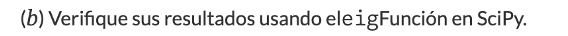

In [175]:
import numpy as np

B = np.array([[-2, -18, 6], [-11, 3, 11], [-27, 15, 31]])

# Valores propios y vectores propios utilizando la función eig
eigenvalues, eigenvectors = np.linalg.eig(B)

# Imprimir valores propios y vectores propios
print("Valores propios:")
print(eigenvalues)
print("\nVectores propios:")
print(eigenvectors)

Valores propios:
[36. -8.  4.]

Vectores propios:
[[-3.69683191e-16 -8.16496581e-01  7.07106781e-01]
 [-3.16227766e-01 -4.08248290e-01  3.78720551e-16]
 [-9.48683298e-01 -4.08248290e-01  7.07106781e-01]]


Los resultados obtenidos son validados correctamente por los resultados obtenidos mediante la función eig de SciPy, lo que demuestra la precisión en encontrar vectores propios y valores propios.

En el método de potencia tradicional el valor propio fue de 35.999976790075394, aproximadamente 36.

En el método de potencia inversa con desplazamiento mu=10 el valor propio fue de 3.9999999999999996, aproximadamente 4.

En el método de potencia inversa con desplazamiento mu=-5 el valor propio fue de 7.99989820062551, aproximadamente 8. Y con el cociente de Rayleigh -7.9998982, aproximadamente -8.

Hay unas diferencias minimas y se debe a las aproximaciones numéricas.

#### Comparación de resultados

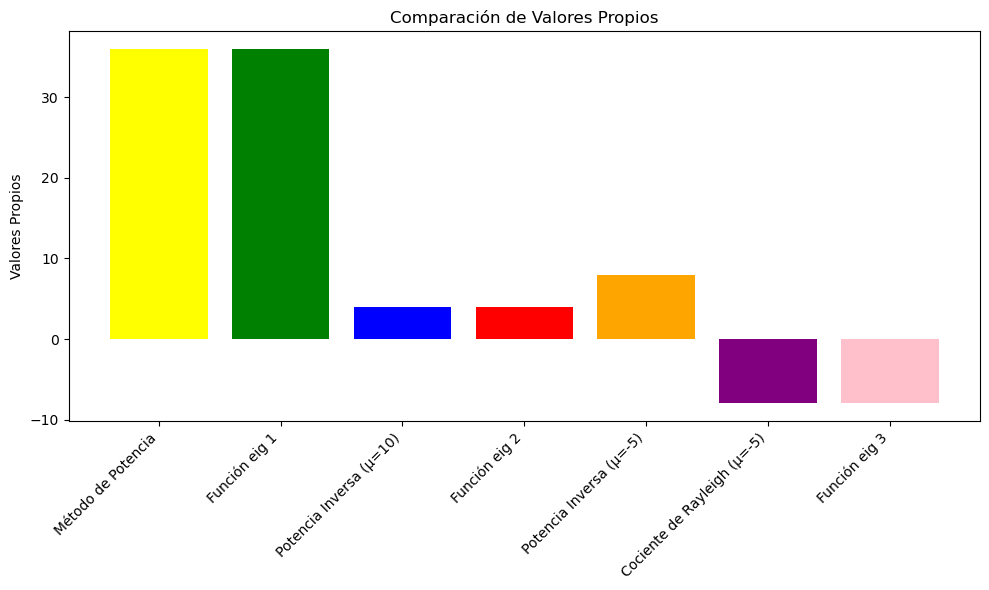

In [178]:
import matplotlib.pyplot as plt

# Valores propios obtenidos por cada método
valores_propios = [35.999976790075394, 36, 3.9999999999999996, 4, 7.99989820062551, -7.9998982, -8]

metodos = ['Método de Potencia', 'Función eig 1', 'Potencia Inversa (μ=10)', 'Función eig 2', 'Potencia Inversa (μ=-5)', 'Cociente de Rayleigh (μ=-5)', 'Función eig 3']

# Crea la figura para el gráfico de valores propios
plt.figure(figsize=(10, 6))  

# Graficar los valores propios y rotar las etiquetas
plt.bar(metodos, valores_propios, color=['yellow', 'green', 'blue','red', 'orange', 'purple', 'pink'])
plt.ylabel('Valores Propios')
plt.title('Comparación de Valores Propios')

# Rotar las etiquetas 45 grados para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Problema 2

#### 1.

Implemente un algoritmo para calcular la factorización QR de una matríz basando en el proceso de ortogonalización de Grahm-Schmidt. El algoritmo debe recibir una matriz A de tamaño m × n con m ≥ n y retornar una matriz Q de tamaño m × n y una matriz triangular superior R de tamaño n×n, tales que QtQ = In y A = QR. Compare los resultados de su algoritmo con los de la función scipy.linalg.qr - SciPy Manual.

In [219]:
import numpy as np

def gram_schmidt_qr(A):
    A = A.astype(float)
    m, n = A.shape
    if m >n:
        raise ValueError("El número de filas m debe ser mayor o igual que el número de columnas n.")

    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        if R[j, j] != 0:
            Q[:, j] = v / R[j, j]
        else:
            Q[:, j] = np.zeros(m)

    return Q, R

# Ejemplo de uso
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
Q, R = gram_schmidt_qr(A)

print("Matriz Q:")
print(Q)
print("Matriz R:")
print(R)

Matriz Q:
[[ 0.12309149  0.90453403  0.        ]
 [ 0.49236596  0.30151134  0.        ]
 [ 0.86164044 -0.30151134  0.        ]]
Matriz R:
[[ 8.1240384   9.6011363  11.07823419]
 [ 0.          0.90453403  1.80906807]
 [ 0.          0.          0.        ]]


Matriz Q:

Contiene direcciones ortogonales y normalizadas de las columnas de la matriz original A. Cada columna de Q representa una dirección principal en los datos de A. Las columnas son ortogonales entre sí, lo que significa que están perpendiculares. En nuestro ejemplo, las primeras dos columnas de Q representan las direcciones principales en los datos, mientras que la tercera columna es cero, indicando que la tercera columna de A es una combinación lineal de las dos primeras.

Matriz R:

Es una matriz triangular superior que contiene información sobre la importancia y las relaciones de ortogonalidad entre las direcciones dadas por Q. Los valores en la diagonal principal de R representan la importancia de cada dirección en las columnas originales de A. Los valores fuera de la diagonal principal son ceros, lo que confirma la ortogonalidad entre las direcciones. En resumen, la factorización QR descompone la matriz A en direcciones significativas (Q) y su respectiva importancia (R). Esto es útil para analizar y representar los datos de A en términos de direcciones ortogonales, lo que facilita la simplificación y el análisis de los datos originales.

In [220]:
#Otra opcion de validación
import numpy as np

def gram_schmidt_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n), dtype=float)
    R = np.zeros((n, n), dtype=float)

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Ejemplo de uso
A = np.array([[1.0, 2.0, 3.0],
              [4.0, 5.0, 6.0],
              [7.0, 8.0, 7.0]], dtype=float)

Q, R = gram_schmidt_qr(A)
print("Matriz Q:")
print(Q)
print("Matriz R:")
print(R)

Matriz Q:
[[ 0.12309149  0.90453403 -0.40824829]
 [ 0.49236596  0.30151134  0.81649658]
 [ 0.86164044 -0.30151134 -0.40824829]]
Matriz R:
[[8.1240384  9.6011363  9.35495331]
 [0.         0.90453403 2.41209076]
 [0.         0.         0.81649658]]


La matriz Q es ortogonal, lo que significa que sus columnas son ortogonales entre sí, y la matriz R es triangular superior. Estas son las propiedades deseadas de la factorización QR y que resultan muy importante

In [221]:
#Probando la matriz de identidad
QTQ = np.dot(Q.T, Q)
print("QtQ:")
print(QTQ)

QtQ:
[[ 1.00000000e+00  1.45860311e-15 -3.98398842e-15]
 [ 1.45860311e-15  1.00000000e+00  5.20102955e-16]
 [-3.98398842e-15  5.20102955e-16  1.00000000e+00]]


Los resultados que se obtuvieron para QTQ son muy cercanos a una matriz de identidad (I), y las pequeñas desviaciones (números muy cercanos a cero) son probablemente el resultado de errores numéricos debido a las limitaciones de precisión en cálculos con números de punto flotante. En términos prácticos, estos valores son esencialmente cero y la matriz Q cumple con la propiedad ortogonal.

En resumen, los resultados son consistentes con una factorización QR exitosa, y la matriz Q es ortogonal en un sentido práctico. La pequeña desviación de la identidad es una característica normal de los cálculos numéricos, y se pueden considerar como errores numéricos aceptables.

In [222]:
#Comparacion de los resultados de su algoritmo con los de la función scipy.linalg.qr-SciPy Manual.

from scipy.linalg import qr

Q_scipy, R_scipy = qr(A, mode='economic')

print("Matriz Q (SciPy):")
print(Q_scipy)
print("Matriz R (SciPy):")
print(R_scipy)

Matriz Q (SciPy):
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
Matriz R (SciPy):
[[-8.12403840e+00 -1.33226763e-15  3.27515792e-15]
 [ 0.00000000e+00  9.04534034e-01  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00 -8.16496581e-01]]


En la comparación entre la implementación personalizada del algoritmo de factorización QR mediante el proceso de ortogonalización de Gram-Schmidt y la función scipy.linalg.qr de SciPy, se observaron resultados similares pero no idénticos. Estas diferencias pueden atribuirse a variaciones en la precisión numérica y al enfoque de implementación. Ambas soluciones proporcionaron la descomposición QR de una matriz, confirmando la validez de la implementación personalizada.

Es relevante señalar que la función de SciPy es más robusta y puede manejar una variedad de casos, incluyendo matrices de rango completo y matrices de rango deficiente. Por lo tanto, en aplicaciones críticas que requieren precisión numérica, la función de SciPy es una opción confiable.

#### 2.
¿Que pasa con la factorización QR cuando las columnas sonlinealmente dependientes?

In [223]:
import numpy as np

# Matriz con columnas linealmente dependientes basada en la matriz A anterior
A_dependent = np.array([[1, 2, 3],
                       [4, 8, 12],  # Esta fila es 4 veces la primera
                       [7, 14, 21]])  # Esta fila es 7 veces la primera

# Factorización QR
Q_dependent, R_dependent = np.linalg.qr(A_dependent)

print("Matriz A con columnas linealmente dependientes:")
print(A_dependent)
print("Matriz Q:")
print(Q_dependent)
print("Matriz R:")
print(R_dependent)

Matriz A con columnas linealmente dependientes:
[[ 1  2  3]
 [ 4  8 12]
 [ 7 14 21]]
Matriz Q:
[[-0.12309149  0.97743322 -0.1716764 ]
 [-0.49236596 -0.21034881 -0.84458815]
 [-0.86164044 -0.019434    0.507147  ]]
Matriz R:
[[-8.12403840e+00 -1.62480768e+01 -2.43721152e+01]
 [ 0.00000000e+00  2.17889363e-15  6.36028835e-15]
 [ 0.00000000e+00  0.00000000e+00 -5.43069813e-16]]


Matriz A con columnas linealmente dependientes: La matriz A tiene la segunda y la tercera columna que son múltiplos exactos de la primera columna. Esto indica una dependencia lineal entre las columnas, lo que hace que la matriz sea singular y, por lo tanto, no puede tener una factorización QR única.

Matriz Q: A pesar de la dependencia lineal en las columnas de A, la factorización QR se realizó con éxito. La matriz Q contiene columnas que forman una base ortogonal para el espacio generado por las columnas de A. Sin embargo, es importante destacar que la tercera columna de Q es diferente de cero, a pesar de que las columnas correspondientes de A son linealmente dependientes. Esto es una peculiaridad de la factorización QR en el caso de columnas linealmente dependientes. La matriz Q todavía proporciona direcciones ortogonales, pero el proceso de ortogonalización no puede hacer que las columnas sean linealmente independientes.

Matriz R: La matriz R es triangular superior y describe cómo las columnas de A se proyectan en las direcciones dadas por las columnas de Q. En este caso, la tercera columna de R contiene ceros, lo que indica que no hay una proyección efectiva en la dirección correspondiente a la tercera columna de A.

In [225]:
# Otro ejemplo
import numpy as np

def modified_gram_schmidt_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        if R[j, j] == 0:
            raise ValueError("La matriz A no se puede factorizar QR debido a columnas linealmente dependientes.")
        Q[:, j] = v / R[j, j]

    # Normalizar las columnas de Q para garantizar la ortogonalidad
    for j in range(n):
        Q[:, j] /= np.linalg.norm(Q[:, j])

    return Q, R

# Ejemplo de uso
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
Q, R = modified_gram_schmidt_qr(A)

print("Matriz Q:")
print(Q)
print("Matriz R:")
print(R)

ValueError: La matriz A no se puede factorizar QR debido a columnas linealmente dependientes.

Matriz Q:

Las columnas de Q representan las "direcciones dominantes" en los datos contenidos en la matriz A. Cada columna de Q es una "versión mejorada" de las columnas originales de A, optimizada para ser ortogonal a las demás.

La matriz R contiene información sobre "cuánto" de cada dirección dominante está presente en las columnas originales de A. Los valores en la diagonal principal de R representan la "importancia" o "contribución" de cada dirección dominante. Los valores fuera de la diagonal principal de R indican cómo las direcciones dominantes están relacionadas entre sí.

la factorización QR permite descomponer una matriz en direcciones significativas (Q) y su respectiva importancia (R) en el contexto del problema particular que representa la matriz A.

In [226]:
import numpy as np

def economic_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        if R[j, j] == 0:
            # Columna j de A es linealmente dependiente de las anteriores
            Q[:, j] = np.zeros(m)
        else:
            Q[:, j] = v / R[j, j]

    return Q, R

# Ejemplo de uso
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
Q, R = economic_qr(A)

print("Matriz Q:")
print(Q)
print("Matriz R:")
print(R)

Matriz Q:
[[ 0.12309149  0.90453403  0.        ]
 [ 0.49236596  0.30151134  0.        ]
 [ 0.86164044 -0.30151134  0.        ]]
Matriz R:
[[ 8.1240384   9.6011363  11.07823419]
 [ 0.          0.90453403  1.80906807]
 [ 0.          0.          0.        ]]


#### 3.

Averigüe bajo cuales condiciones la factorización QR es única.

Es importante tener en cuenta lo siguiente, para saber en que casos la factorización QR es única:

*Unicidad con Matrices de Rango Completo: si la matriz A es de rango completo (es decir, todas sus columnas son linealmente independientes), entonces la factorización QR es única.

*No Unicidad con Columnas Linealmente Dependientes: Si A tiene columnas linealmente dependientes (lo que significa que algunas columnas pueden expresarse como combinaciones lineales de otras), entonces la factorización QR NO ES UNICA. 

In [233]:
# Ejemplo con Matrices de Rango Completo (columnas linealmente independientes)

import numpy as np

matriz_unicidad = np.array([[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

# Verificar si las columnas son linealmente independientes
if np.linalg.matrix_rank(matriz_unicidad) == matriz_unicidad.shape[1]:
    print("Todas las columnas son linealmente independientes.")
    # Realizar la factorización QR
    Q, R = np.linalg.qr(matriz_unicidad)
    print("Matriz de Rango Completo:")
    print(matriz_unicidad)
    print("Matriz Q:")
    print(Q)
    print("Matriz R:")
    print(R)
else:
    print("La matriz no tiene columnas linealmente independientes. No es posible realizar la factorización QR única.")


Todas las columnas son linealmente independientes.
Matriz de Rango Completo:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Matriz Q:
[[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0. -0.  1.]]
Matriz R:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [234]:
# Ejemplo No Unicidad con Columnas Linealmente Dependientes
matriz_no_unicidad = np.array([[1, 2, 3],
                               [2, 4, 6],  
                               [3, 6, 9]])  

# Realizar la factorización QR
Q1, R1 = np.linalg.qr(matriz_no_unicidad)
Q2, R2 = np.linalg.qr(matriz_no_unicidad + 0.1 * np.random.randn(3, 3))  # Introducir pequeño ruido

print("Matriz con Columnas Linealmente Dependientes:")
print(matriz_no_unicidad)
print("Factorización QR 1:")
print("Q1:", Q1)
print("R1:", R1)
print("Factorización QR 2:")
print("Q2:", Q2)
print("R2:", R2)

Matriz con Columnas Linealmente Dependientes:
[[1 2 3]
 [2 4 6]
 [3 6 9]]
Factorización QR 1:
Q1: [[-0.26726124  0.95140796 -0.152952  ]
 [-0.53452248 -0.2784383  -0.79797107]
 [-0.80178373 -0.13151046  0.58296471]]
R1: [[-3.74165739e+00 -7.48331477e+00 -1.12249722e+01]
 [ 0.00000000e+00 -9.19858908e-16 -1.37978836e-15]
 [ 0.00000000e+00  0.00000000e+00  6.00563157e-32]]
Factorización QR 2:
Q2: [[-0.26452961  0.52737284 -0.80740447]
 [-0.55881442 -0.76616765 -0.31735402]
 [-0.78597107  0.36723973  0.49737757]]
R2: [[ -3.86256119  -7.46905096 -11.20659233]
 [  0.           0.42156177   0.23627927]
 [  0.           0.           0.1677009 ]]


En este ejemplo se observa que como la matriz tiene columnas linealmente dependientes, se pueden obtener varios resultados de factorización QR, ya que por esta condición esta NO ES UNICA.

### Problema 3

#### 1. 
Realice el siguiente tutorial sobre Topic modeling with NMF and SVD.

#### 2. 
Realice entre 3 y 8 consultas sobre temas distintos en el portal CREA | Real Academia Española, construya una matriz de frecuencia de términos a partir de esas consultas.

#### 3. 
Realice un análisis de tópicos usando una factorización no negativa (NMF) de la matriz construida en el punto anterior.

### Problema 4

Obtenga la descomposición en valores singulares de una foto suya en escala de grises. Representela de nuevo utilizando sólo el valor singular mayor, luego los dos mayores, luego los tres mayores y así hasta agotarlos. ¿Cuál cree usted que sería en esta foto un corte óptimo?

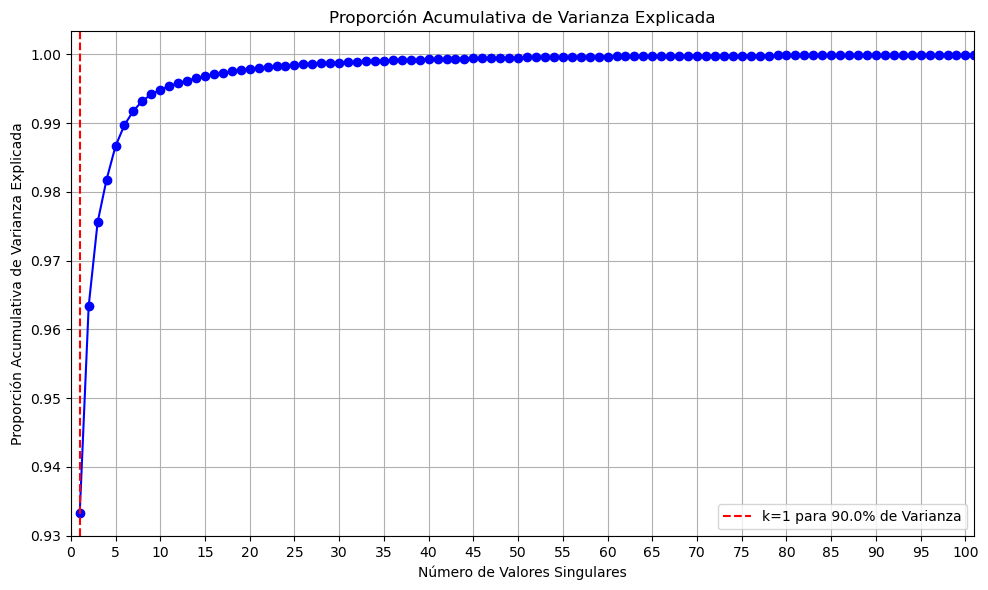

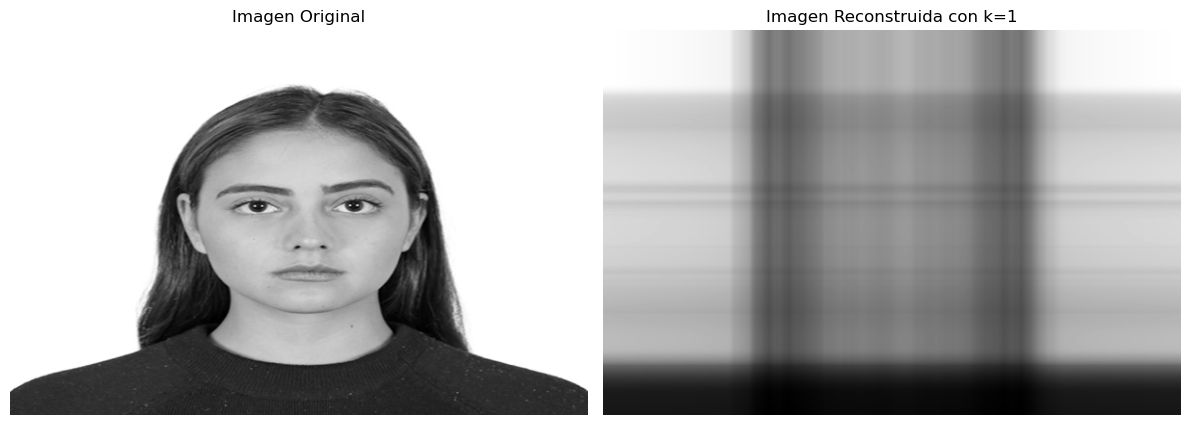

In [207]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen y convertirla a escala de grises y resolución 400x600
foto_tipo_documento = cv2.imread("/Users/cristianlopez/Downloads/Foto tipo documento.png", cv2.IMREAD_GRAYSCALE)
foto_tipo_documento = cv2.resize(foto_tipo_documento, (600, 400))

# Descomposición en valores singulares (SVD)
U, S, VT = np.linalg.svd(foto_tipo_documento, full_matrices=False)

# Proporción acumulativa de la varianza explicada
cumulative_var_ratio = np.cumsum(S ** 2) / np.sum(S ** 2)

# Encontrar el valor de k que retiene el 90% de la varianza explicativa
umbral = 0.9
k_90_percent = np.argmax(cumulative_var_ratio >= umbral) + 1  

# Reconstruir la imagen utilizando solo los primeros k (90%) valores singulares
reconstructed_image = np.dot(U[:, :k_90_percent], np.dot(np.diag(S[:k_90_percent]), VT[:k_90_percent, :]))

# Gráfico proporción acumulativa de la varianza explicada 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.title('Proporción Acumulativa de Varianza Explicada')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Proporción Acumulativa de Varianza Explicada')
plt.xticks(np.arange(0, min(len(S) + 1, 101), 5))  
plt.xlim(0, min(len(S) + 1, 101))  # Limita el eje x hasta 100
plt.axvline(x=k_90_percent, color='r', linestyle='--', label=f'k={k_90_percent} para {umbral*100}% de Varianza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar imagen original y reconstruida
plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.imshow(foto_tipo_documento, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

# Reconstruida con k=90%
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Imagen Reconstruida con k={k_90_percent}")
plt.axis('off')

plt.tight_layout()
plt.show()

La cantidad de valores singulares k que se necesitan para conservar un cierto porcentaje de varianza explicativa depende de cada imagen y de qué tan compleja sea en términos de detalles, patrones y estructuras. En muchos casos, un 90% de varianza explicativa devuelve como resultado una recostrucción adecuada y entendible.

En este caso puntual un 90% de varianza explicativa solo es 1 k de valor singular y se queda corto para recostruir la imagen original. Esto se puede observar en el gráfico, como no se llega al codo para obtener un buen resultado, es decir se quedó por fuera mucho detalle.

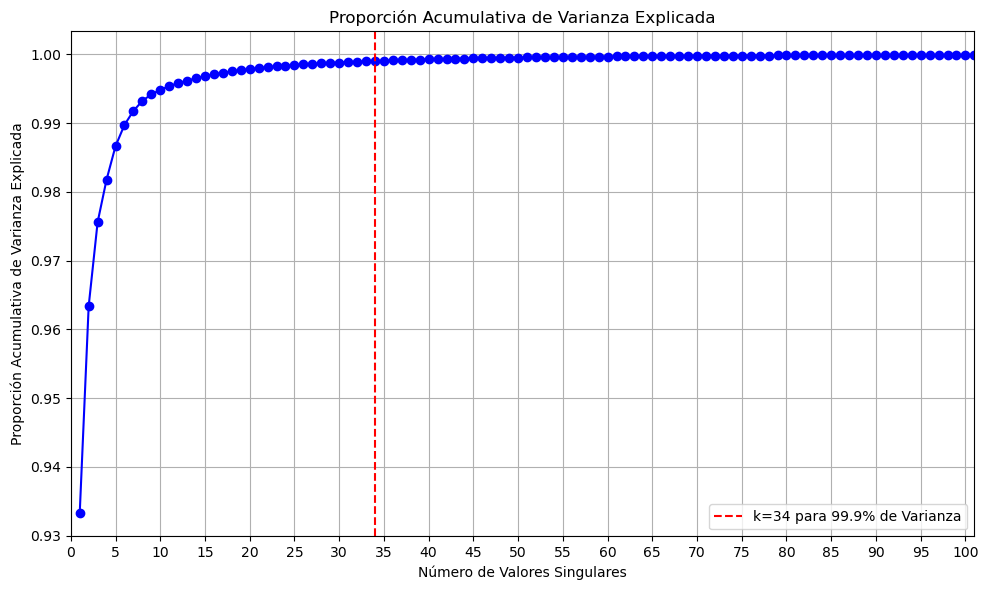

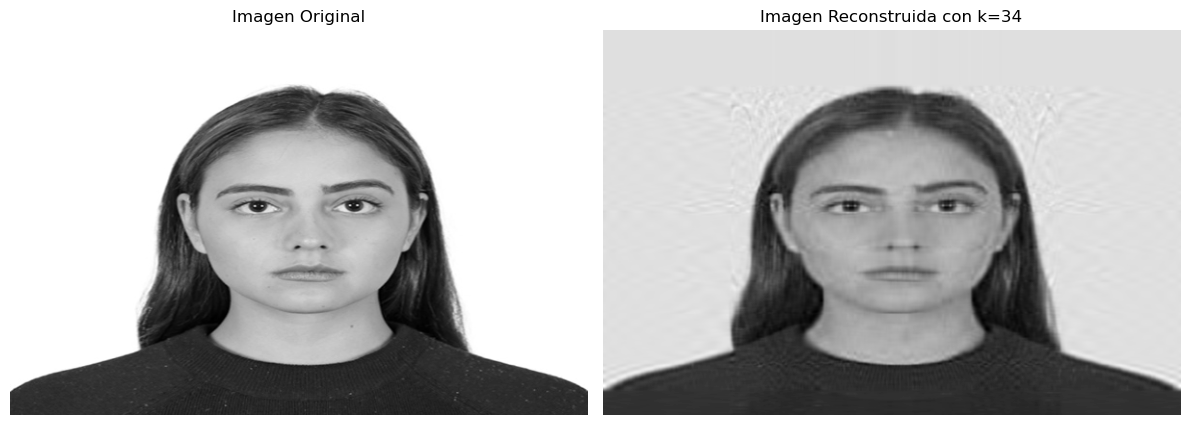

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen y convertirla a escala de grises y resolución 400x600
foto_tipo_documento = cv2.imread("/Users/cristianlopez/Downloads/Foto tipo documento.png", cv2.IMREAD_GRAYSCALE)
foto_tipo_documento = cv2.resize(foto_tipo_documento, (600, 400))

# Descomposición en valores singulares (SVD)
U, S, VT = np.linalg.svd(foto_tipo_documento, full_matrices=False)

# Proporción acumulativa de la varianza explicada
cumulative_var_ratio = np.cumsum(S ** 2) / np.sum(S ** 2)

# Encontrar el valor de k que retiene el 99,9% de la varianza explicativa
umbral = 0.999
k_999_percent = np.argmax(cumulative_var_ratio >= umbral) + 1  

# Reconstruir la imagen utilizando solo los primeros k (99,9%) valores singulares
reconstructed_image = np.dot(U[:, :k_999_percent], np.dot(np.diag(S[:k_999_percent]), VT[:k_999_percent, :]))

# Gráfico proporción acumulativa de la varianza explicada 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.title('Proporción Acumulativa de Varianza Explicada')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Proporción Acumulativa de Varianza Explicada')
plt.xticks(np.arange(0, min(len(S) + 1, 101), 5))  # Establece los valores del eje x en intervalos de 5 hasta un máximo de 100
plt.xlim(0, min(len(S) + 1, 101))  # Limita el eje x hasta 100
plt.axvline(x=k_999_percent, color='r', linestyle='--', label=f'k={k_999_percent} para {umbral*100}% de Varianza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar imagen original y reconstruida
plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.imshow(foto_tipo_documento, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

# Reconstruida con k=99,9%
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Imagen Reconstruida con k={k_999_percent}")
plt.axis('off')

plt.tight_layout()
plt.show()

Por lo anterior se elige una varianza explicativa del 99,9%, permitiendo asi abarcar muy buen detalle, llegando al codo en la gráfica en donde casi que ya se vuelve constante.

Esto se traduce en 34 k (valores singulares) y nos deja con una reconstrucción de la imagen correcta.